<a href="https://colab.research.google.com/github/madol-abraham/Complete-date-science-and-machine-learning/blob/main/Basic_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Read the dataset
df = pd.read_csv('height-weight.csv')
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight vs Height')

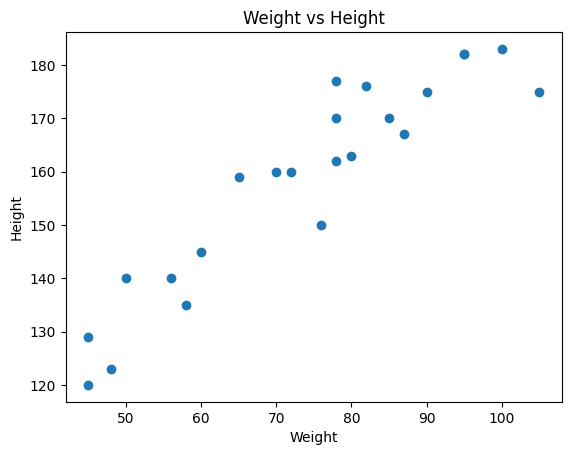

In [ ]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')

In [ ]:
# divide our dataset into dependent and independent features
X = df[['Weight']] # independent features
y = df['Height'] # dependent features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(23, 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [ ]:
# standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


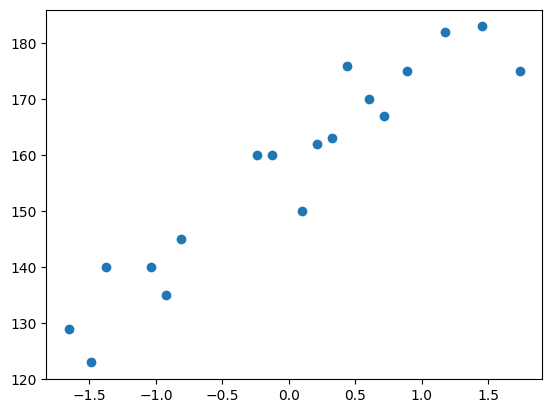

In [ ]:
plt.scatter(X_train, y_train)
##plt.xlabel('Weight')
##plt.ylabel('Height')

In [ ]:
# train simple linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("the slope or coefficient of weight is",regressor.coef_)
print("Intercept", regressor.intercept_)

the slope or coefficient of weight is [17.03440872]
Intercept 157.5


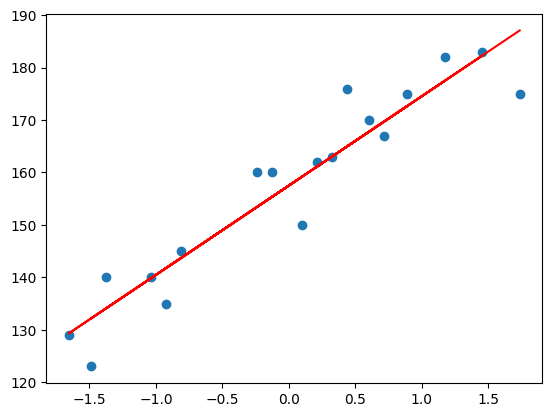

In [ ]:
plt.scatter(X_train, y_train)
# best fit line
plt.plot(X_train, regressor.predict(X_train), 'r')

**prediction of train data**

predicted height output= intercept +coef_(Weights)

y_pred_train =157.5 + 17.03(X_train)

**prediction of test data**

predicted height output= intercept +coef_(Weights)

y_pred_test =157.5 + 17.03(X_test)

In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
y_pred_test, y_test

(array([1486.18388009, 1486.18388009,  924.04839236, 1775.76882831,
        1264.73656674]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

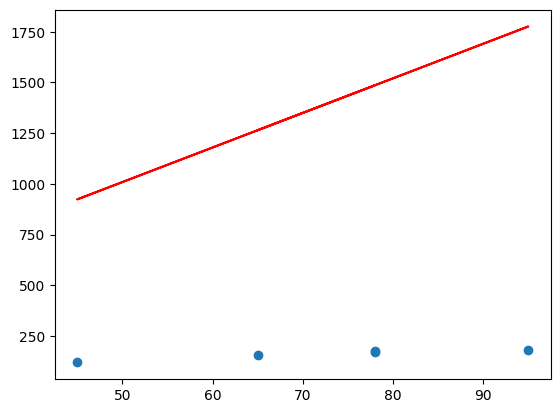

In [ ]:
plt.scatter(X_test, y_test)
# best fit line
plt.plot(X_test, regressor.predict(X_test), 'r')

# performance metrics

# mse, mae, Rmse

# R square and adjusted R square

In [ ]:
# performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1571109.7376966465
1225.7843095186977
1253.4391639392184


**R square**
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
print(score)

-3190.755521080462


**Adjusted R2** = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [ ]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-4254.6740281072825

In [ ]:
regressor

LinearRegression()

In [ ]:
# new data point weight is 80
scaled_Weight = scaler.transform([[80]])
scaled_Weight

array([[80.]])

In [ ]:
print("the height prediction for 80 kg is ", regressor.predict(scaler.transform([[0]])))

the height prediction for 80 kg is  [157.5]


In [ ]:
#scaled_Weight[0]

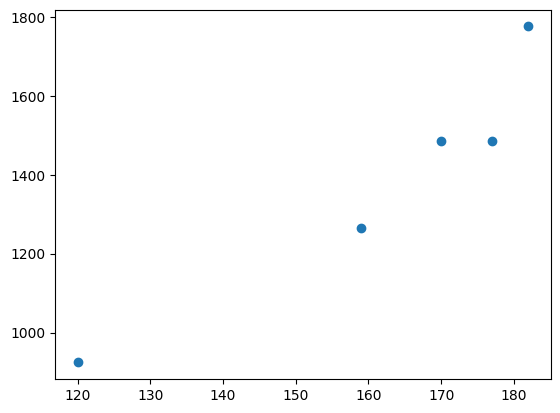

In [ ]:
##Assumptions
##plot the scatterplot
plt.scatter(y_test, y_pred_test)

In [ ]:
## Residuals
residuals = y_test - y_pred_test
residuals

,Height
15,-1309.183880
9,-1316.183880
0,-804.048392
8,-1593.768828
17,-1105.736567


<ipython-input-60-a021a175595d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde = True)


<Axes: xlabel='Height', ylabel='Density'>

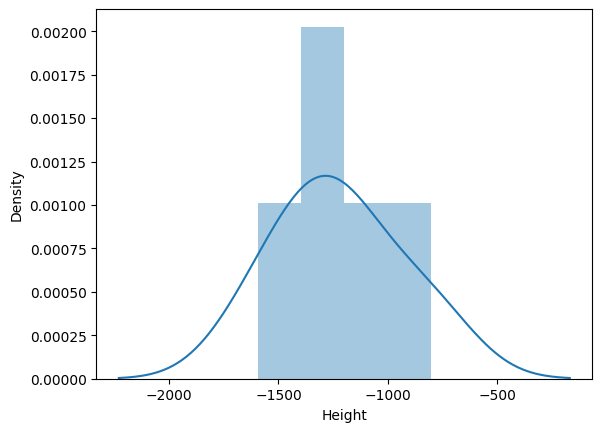

In [ ]:
# plot this residuals
import seaborn as sns
sns.distplot(residuals,kde = True)

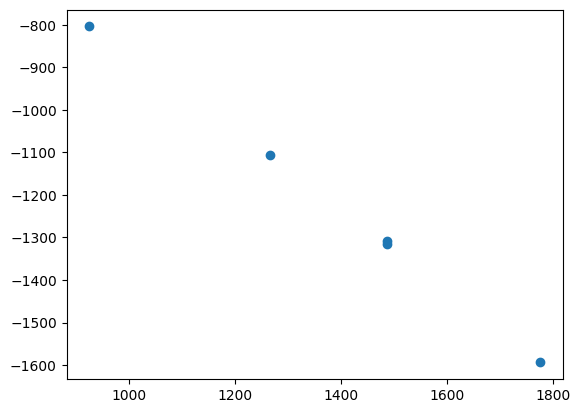

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)